In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

In [2]:
#Пространство признаков для объекта (стаж репетиторы)
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

# Целевая переменная (средний балл ЕГЭ)
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

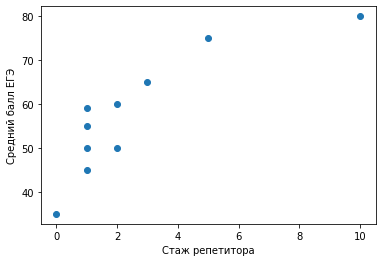

In [3]:
plt.scatter(X[1,:], y)
plt.xlabel('Стаж репетитора')
plt.ylabel('Средний балл ЕГЭ')
plt.show()

In [4]:
# mean square error
calc_mse = lambda y, y_pred: np.mean((y - y_pred)**2)

**1. Для нахождения весовых коэффициентов методом градиентного спуска подберите скорость обучения (alpha) и количество итераций.**

In [5]:
# число наблюдений
n = X.shape[1]

# шаг градиентного спука
alpha = 1e-2

# текущие весовые коэффициенты
W = np.array([1, 0.5])

# максимальное число итераций
max_iter = 10**3

In [6]:
for i in range(max_iter + 1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % (max_iter / 10) == 0:
        print(i, W, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219886


**2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте её.**

In [7]:
for i in range(max_iter + 1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % (max_iter / 10) == 0:
        print(i, W, err)

0 [47.23089306  3.91095773] 45.937500854175845
100 [47.23090806  3.91097273] 45.9375008404508
200 [47.23090806  3.91097273] 45.9375008404508
300 [47.23090806  3.91097273] 45.9375008404508
400 [47.23090806  3.91097273] 45.9375008404508
500 [47.23090806  3.91097273] 45.9375008404508
600 [47.23090806  3.91097273] 45.9375008404508
700 [47.23090806  3.91097273] 45.9375008404508
800 [47.23090806  3.91097273] 45.9375008404508
900 [47.23090806  3.91097273] 45.9375008404508
1000 [47.23090806  3.91097273] 45.9375008404508


Ошибка в суммировании `np.sum(X * (y_pred - y))`. В данном случае получается одно число вместо веткора. В итоге из каждого весового коэффициента вычитаеются одинаковые значения вместо вектора приращения весов. Исправленный вариант:

In [8]:
for i in range(max_iter + 1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * X @ (y_pred - y)))
    if i % (max_iter / 10) == 0:
        print(i, W, err)

0 [47.23091932  3.91096147] 45.9375008404508
100 [47.23171131  3.91079397] 45.937500102236875
200 [47.23199112  3.91074231] 45.93750001263971
300 [47.2320895   3.91072414] 45.93750000156267
400 [47.2321241   3.91071775] 45.9375000001932
500 [47.23213626  3.9107155 ] 45.93750000002389
600 [47.23214054  3.91071471] 45.93750000000297
700 [47.23214204  3.91071444] 45.937500000000384
800 [47.23214257  3.91071434] 45.93750000000005
900 [47.23214276  3.9107143 ] 45.937500000000014
1000 [47.23214282  3.91071429] 45.937500000000014


**3. Переделать модель с использованием градиентного спуска, выбрав в качестве критерия остановки критерий сходимости.** 

In [9]:
# число наблюдений
n = X.shape[1]

# шаг градиентного спука
alpha = 1e-2

# текущие весовые коэффициенты
W = np.array([1, 0.5])

# начальная разница весов
weight_dist = np.inf

# счетчик итераций
i = 0

# критерий сходимости
e = 1e-8

while weight_dist > e:
    i += 1
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    new_W = W - 2 * alpha * X @ (y_pred - y) / n

    weight_dist = np.linalg.norm(W - new_W, ord=2)
    W = new_W
    if i % 100 == 0:
        print(i, W, err, weight_dist)

        
print(f'\n\nРассчитанные весовые коэффициенты: {round(W[0],3)}, {round(W[1], 3)}.')

100 [31.72648327  6.77395294] 177.92494760058077 0.16567313451087598
200 [41.78014899  4.91746666] 62.25534704257841 0.058252853340136745
300 [45.3151501   4.26470166] 47.95490496498403 0.02048246948599589
400 [46.55810299  4.0351809 ] 46.186915427300114 0.007201905695418139
500 [46.99514157  3.95447839] 45.96833568071608 0.00253228477558301
600 [47.14881009  3.92610232] 45.94131227101915 0.0008903846364853289
700 [47.20284196  3.91612492] 45.93797131796625 0.0003130709502086777
800 [47.22184028  3.91261674] 45.93755826989325 0.0001100798641956663
900 [47.22852033  3.91138321] 45.93750720401236 3.8705528227146644e-05
1000 [47.23086913  3.91094949] 45.937500890645076 1.3609372851306031e-05
1100 [47.231695    3.91079699] 45.93750011011208 4.785234508432417e-06
1200 [47.23198538  3.91074336] 45.93750001361335 1.6825513972874567e-06
1300 [47.23208749  3.91072451] 45.93750000168304 5.916072065352864e-07
1400 [47.23212339  3.91071788] 45.93750000020808 2.0801687666988625e-07
1500 [47.2321360

Весовые коэффициенты, рассчитанные аналитически.

In [10]:
W_mnk = np.linalg.inv(X @ X.T) @ X @ y
W_mnk

array([47.23214286,  3.91071429])

Построим графики моделей по весовым коэффициентам рассчитанным аналитически и методом градиентного спуска.

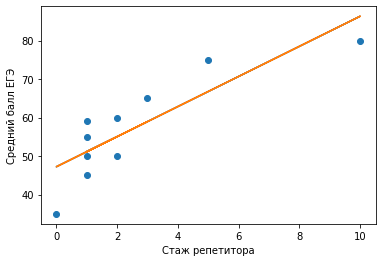

In [11]:
plt.scatter(X[1,:], y)
plt.plot(X[1,:], W @ X)
plt.plot(X[1,:], W_mnk @ X)
plt.xlabel('Стаж репетитора')
plt.ylabel('Средний балл ЕГЭ')
plt.show()

Графики полностью совпадают.

Посчитаем, какой стаж должен иметь репетитор, чтобы ученик в среднем набирал 100 балов за ЕГЭ.

In [12]:
x_100 = (100 - W[0]) / W[1]
x_100

13.493150330292593

Получили 13,5 лет.